## Decision Trees

In this notebook you will experiment with different tree based algorithms on some different datasets. You will need to:


Create 3 models:

1. DecisionTreeClassifier()
2. RandomForestClassifier()
3. XGBClassifier()

These will be inserted into the dictionaries below for comparison.

You will also get a feeling for the different hyperparameters for each of these methods. Along with this, I want you to get used to reading the documentation of the different APIs. I will provide you with links.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.training



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

/sciclone/home/jgiroux/.conda/envs/ai4fusion_2025/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


### Example 1

Instantiate your models using the default hyperparameters provided by the API.

Train them for both of the datasets provided below and note any differences you see. Note that in these simple datasets we will not be truly able to appreciate the power of the more advanced XGBoost.

In [ ]:
# Create synthetic 2D dataset
X, y = make_circles(n_samples=1000, noise=0.2, factor=0.5, random_state=42)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classifiers
# Insert the 3 differnt models here under their associated names
# Hint: You will want to check what we have imported above and reference their class names in the above documentation
# For all of the models set the random state = 42
# In this first section you should expect
# Decision Tree - two arguments, max_depth=5 and random_state=42
# Random Forest - two arguments, n_estimators=100 and random_state=42
# XGBoost - two arguments, eval_metric="logloss" and random_state=42
models = {
    "Decision Tree":
    "Random Forest":
    "XGBoost":
}

# Train and evaluate
results = {}

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results[name] = (model, train_acc, test_acc, train_time)

    print(f"{name}")
    print(f"  → Train Accuracy: {train_acc:.3f}")
    print(f"  → Test  Accuracy: {test_acc:.3f}")
    print(f"  → Train Time    : {train_time*1000:.2f} ms\n")

# Plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()

# Visualize each model
for name, (model, train_acc, test_acc, _) in results.items():
    plot_decision_boundary(model, X, y, f"{name}\nTrain Acc: {train_acc:.2f} | Test Acc: {test_acc:.2f}")


### Another Dataset

Copy your models code from above here.

In [ ]:
# Create synthetic 2D dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Classifiers - copy from above
models = {
    "Decision Tree":
    "Random Forest":
    "XGBoost":
}

# Train and evaluate
results = {}

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results[name] = (model, train_acc, test_acc, train_time)

    print(f"{name}")
    print(f"  → Train Accuracy: {train_acc:.3f}")
    print(f"  → Test  Accuracy: {test_acc:.3f}")
    print(f"  → Train Time    : {train_time*1000:.2f} ms\n")

# Plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()

# Visualize each model
for name, (model, train_acc, test_acc, _) in results.items():
    plot_decision_boundary(model, X, y, f"{name}\nTrain Acc: {train_acc:.2f} | Test Acc: {test_acc:.2f}")


### Example 2 - ELM Peak Filtering (Credits: Samuel Jackson, United Kingdom Atomic Energy Authority)



Edge Localized Modes (ELMs) are a type of instability that occur in the edge region of a high-confinement (H-mode) plasma. They can often be characterized by Characterized  sharp peaks in the $D_\alpha$ emission.

Each sample in this dataset is a single peak found from the $D_\alpha$ trace on the MAST tokamak (lines/dots in the plot below.). Each peak has been classified by a human as either "ELM" or "Not ELM". Whether a peak is an ELM or not depends on the plasma temperature, pressure, density, current, NBI heating power, which are provided as input variables. *Note:* Not all ELMs will be so clearly discriminated by time as in the plot below.

![image](image-2.png)

The task in this example is to correctly predict whether or not each data point is an ELM.

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

#### Import the Data

In [19]:
data_elm_example = pd.read_csv('mast_elms.csv',sep=',',index_col=None)
data_elm_example

time             ip     power_nbi  density_gradient     t_e_core  \
0     0.12354  633946.455000  1.914531e+06      5.942272e+19   778.816287   
1     0.12624  643630.640000  1.793411e+06      7.199713e+19   806.330000   
2     0.13236  642951.590000  1.717778e+06      5.582337e+19   886.540783   
3     0.14354  633525.360000  3.435906e+06      1.006768e+20   989.853703   
4     0.14726  634690.050000  3.067380e+06      1.216553e+20  1024.795740   
...       ...            ...           ...               ...          ...   
1603  0.40150  625823.000001  3.596614e+06      3.840381e+20   805.345591   
1604  0.40840  628614.774999  3.547623e+06      1.883917e+20   713.075546   
1605  0.41384  629134.347498  3.630177e+06      3.092133e+20   827.575734   
1606  0.42110  625634.337499  3.605183e+06      1.864259e+20   745.749204   
1607  0.42912  624620.105000  3.564521e+06      1.408850e+20   590.673434   

          n_e_core    dalpha    height  is_elm  shot_id elm_type  
0     2.568696e+19  0.263672  0.263672   False    30421    Mixed  
1     2.620493e+19  2.653809  2.653809   False    30421    Mixed  
2     2.549465e+19  0.217285  0.217285   False    30421    Mixed  
3     2.868911e+19  1.765137  1.765137   False    30421    Mixed  
4     2.925721e+19  0.881348  0.881348   False    30421    Mixed  
...            ...       ...       ...     ...      ...      ...  
1603  3.378183e+19  2.971191  2.971191    True    28145    Mixed  
1604  3.447460e+19  1.252441  1.252441    True    28145    Mixed  
1605  3.284019e+19  1.430664  1.430664    True    28145    Mixed  
1606  3.224999e+19  1.694336  1.694336    True    28145    Mixed  
1607  2.396484e+19  1.152344  1.152344    True    28145    Mixed  

[1608 rows x 11 columns]

#### Plot Features

We can see that the distribution of classes is quite noisy.

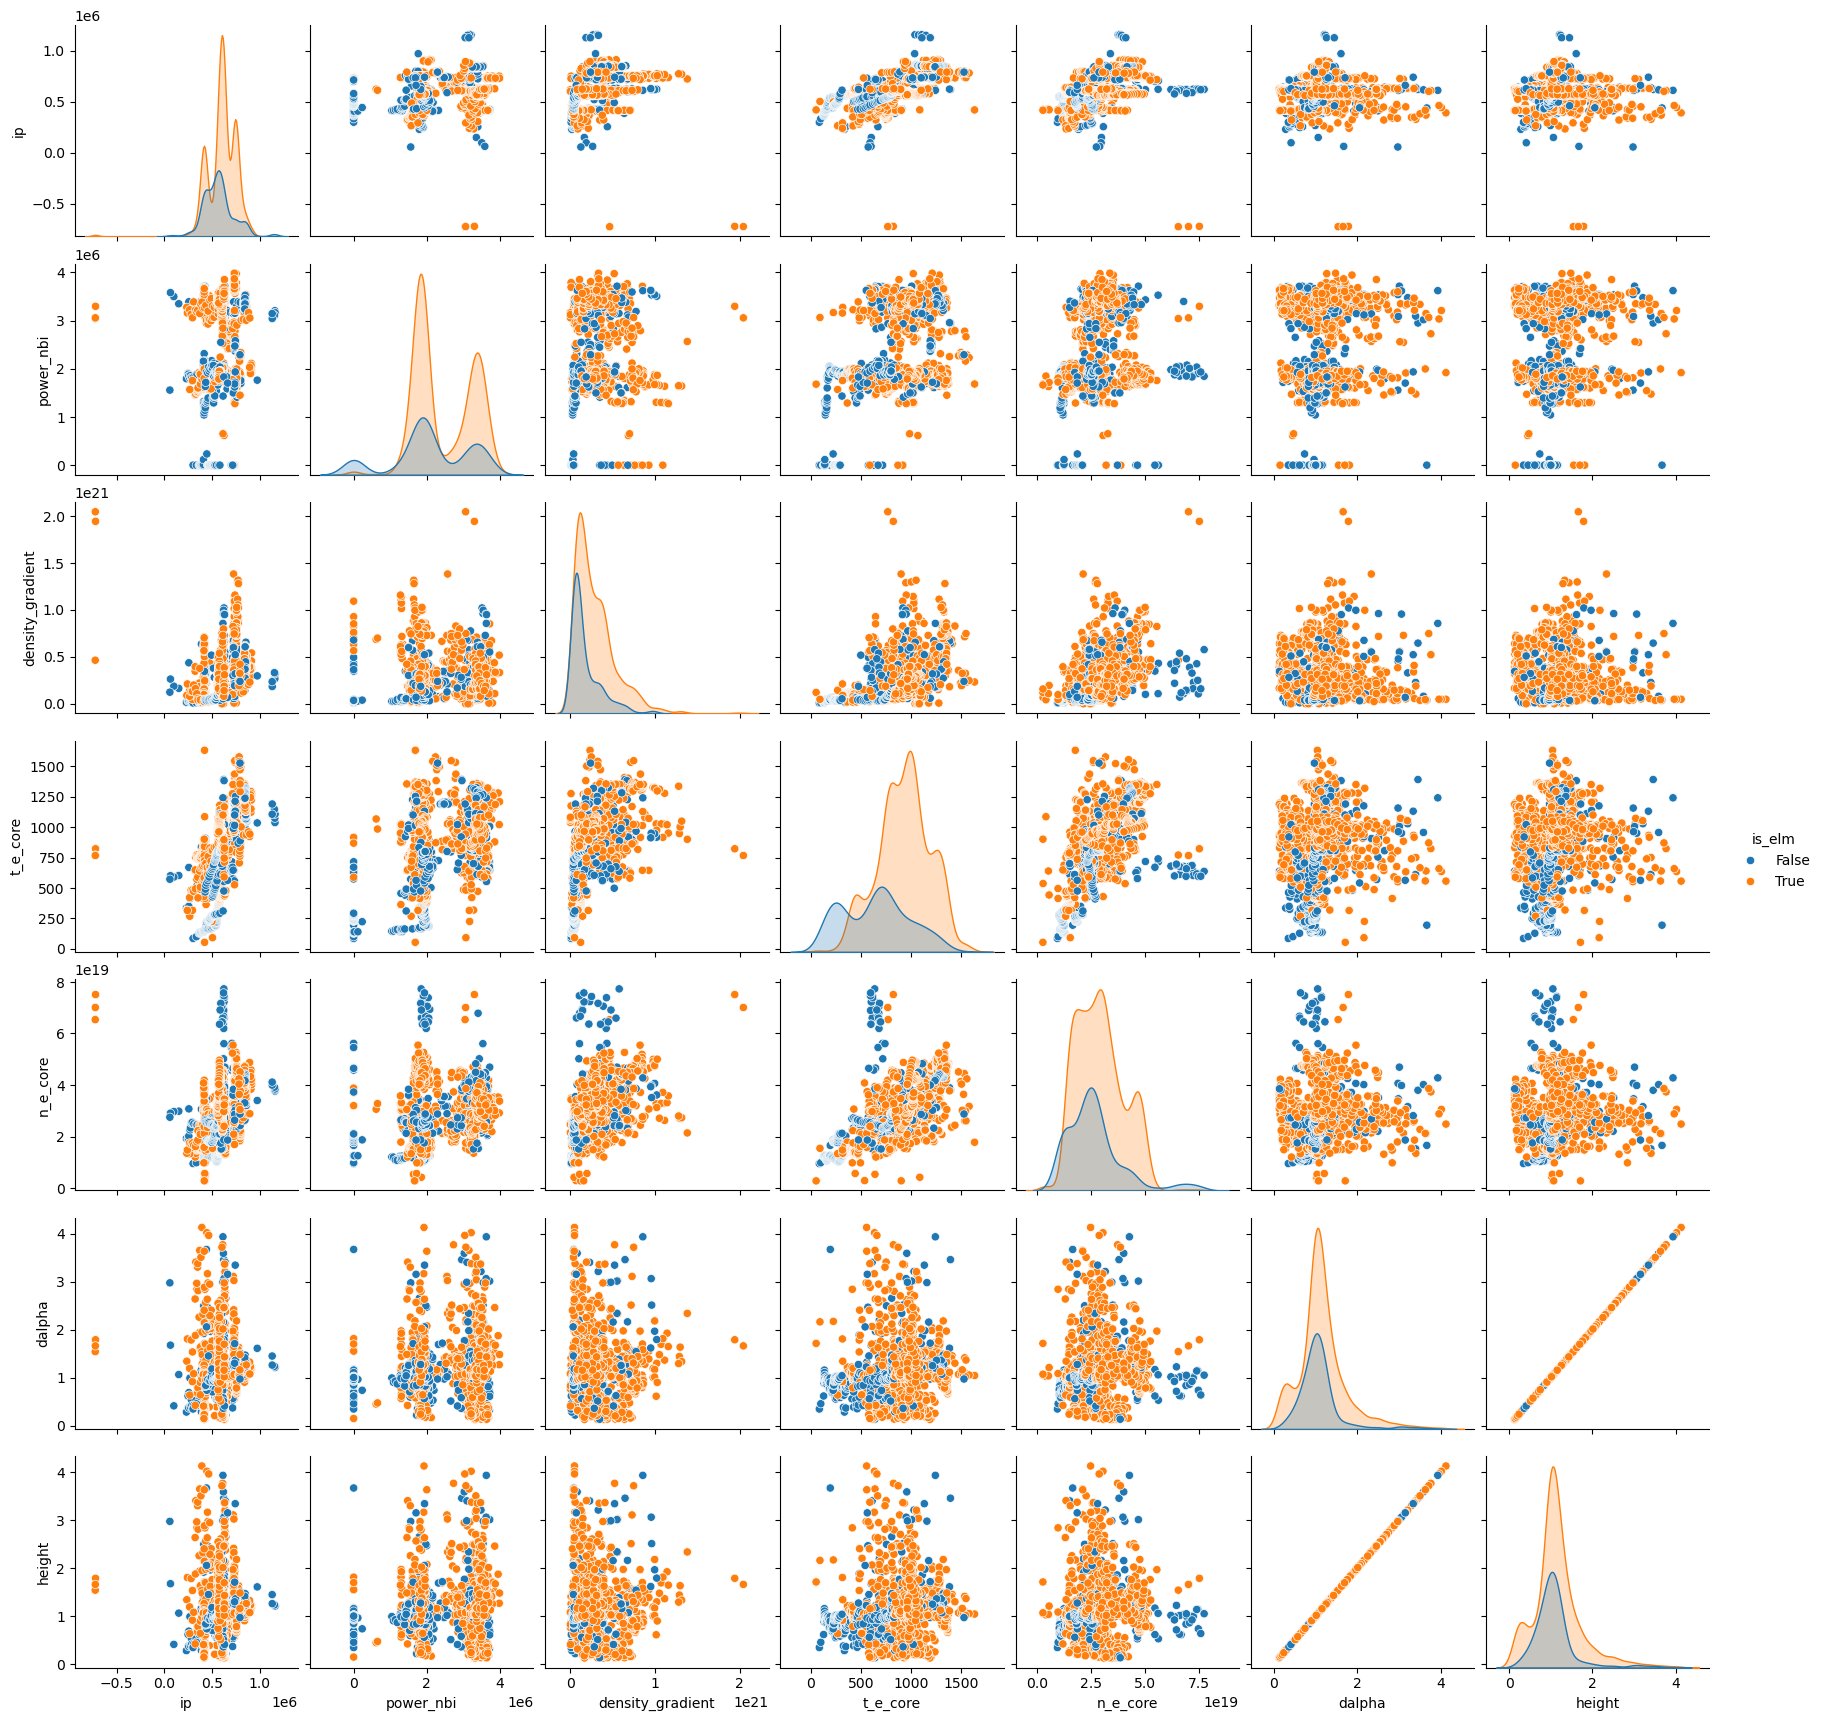

In [3]:
feature_cols = ['ip', 'power_nbi', 'density_gradient', 't_e_core', 'n_e_core', 'dalpha', 'height']
sns.pairplot(data_elm_example[feature_cols + ['is_elm']], hue='is_elm')

#### Prepare Data

In [4]:
y= data_elm_example['is_elm']
x= data_elm_example.drop('is_elm',axis=1)

In [5]:
# We apply a StandardScaler to normalize our features.
# This transforms each feature to have zero mean and unit variance:
#     x' = (x - μ) / σ
# where:
#     μ = mean of the feature
#     σ = standard deviation of the feature

scale = StandardScaler()
x[feature_cols] = scale.fit_transform(x[feature_cols])

#### Select your model

Use one of your models from above.

In [22]:
model = 

#### Cross-Validation with StratifiedKFold and cross_val_score in Scikit-learn

When evaluating machine learning models, it's important to assess how well they generalize to unseen data. Cross-validation is a widely-used technique to do this, and Scikit-learn provides powerful tools to make it easy and reliable. When working with small datasets, cross-validation is particularly advisable because it maximizes the use of available data for both training and testing, helping to reduce variance in performance estimates and provide a more robust evaluation.

**StratifiedKFold** is a variation of KFold cross-validation that ensures each fold of the dataset maintains the same proportion of class labels as the original dataset. This is particularly useful for classification problems, especially when dealing with imbalanced classes.


**Key Parameters:**
* n_splits: Number of folds (e.g., 5 means 80% train / 20% test each time)

* shuffle: Whether to shuffle the data before splitting

* random_state: Seed for reproducibility (only used if shuffle=True)


In the example below, this creates 5 folds, each with roughly the same class distribution as the full dataset.


**cross_val_score** automates the process of splitting the dataset, training the model, and evaluating it on each fold. It works with any estimator that implements .fit() and .predict().

**Key Parameters:**

* estimator: Your model (e.g., XGBoostClassifier())

* X: Features

* y: Labels

* cv: Cross-validation strategy (e.g., StratifiedKFold, integer for default KFold)

* scoring: Metric for evaluation (e.g., 'accuracy', 'f1', 'roc_auc', etc.)

You may want to look into these different evaluation metrics and their meaning if you are not familiar.

In [ ]:
# Parameters
scoring = 'f1'
n_splits = 5

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=123)

# Perform cross-validation
start = time.time()
scores = cross_val_score(model, x[feature_cols], y, cv=skf, scoring=scoring)
total_time = time.time() - start

# Display results
print(f"Total time: {total_time:.3f}s")
print(f"Cross-Validation Results ({scoring.upper()} Score):")
for i, score in enumerate(scores, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\n Mean {scoring.upper()} Score: {np.mean(scores):.4f}")

### Step 2

Play with the hyperparameter settings of each model and get a feel for what they do. You should use the **ELM dataset** and the same cross validation scheme created above.
You can also change the number of folds used, along with the metric used for evaluation.


Things to look for:

1. Performance increases or decreases
2. Increased runtime
3. Overfitting


You can copy the code cells from above.


### Step 3 (if time permits)

Produce some feature importance plots from XGBoost. You may find plots of this nature useful for your final project.
